# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [53]:
df = pd.read_csv("states_edu.csv")
#uploaded the data set to jupyter notebook
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [58]:
df.rename({
    'GRADES_4_G': 'NUM_4',
    'GRADES_8_G': 'NUM_8',
    'GRADES_12_G': 'NUM_12',
    'GRADES_1_8_G' : 'NUM_1_to_8',
    'GRADES_9_12_G': 'NUM_9_to_12',
    'GRADES_ALL_G' : 'NUM_TOTAL',
    'AVG_MATH_4_SCORE' : 'MATH_4',
    'AVG_MATH_8_SCORE' : 'MATH_8',
    'AVG_READING_4_SCORE' : 'READING_4',
    'AVG_READING_8_SCORE' : 'READING_8',   
    }, 
    axis=1,inplace=True)

#renamed some of the values
#checking below

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,NUM_4,NUM_8,NUM_12,NUM_1_to_8,NUM_9_to_12,NUM_TOTAL,MATH_4,MATH_8,READING_4,READING_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [60]:
df.isna().sum()

#df.shape

#there are a good amount of missing values...
#for this data set, since we are assessing MATH_8, lets remove all rows that don't have a MATH_8 value (1113 rows)
#df.dropna(subset=['MATH_8'], inplace=True)

# I am going to skip this part for now so we can assess all the data in this set^ 
# Since df.shape tells us there is only 1715 rows, the amount being assessed would be significantly reduced
# What exact effect does removing these empty values have versus keeping them here?
# This is definitely something I want to explore in the future

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
NUM_4                             83
NUM_8                             83
NUM_12                            83
NUM_1_to_8                       695
NUM_9_to_12                      644
NUM_TOTAL                         83
MATH_4                          1150
MATH_8                          1113
READING_4                       1065
READING_8                       1153
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: MATH_8 (Originally AVG_MATH_8_SCORE)

How many years of data are logged in our dataset? 

In [6]:
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [7]:
state = df.groupby("STATE")
state["MATH_8"].mean()

# Michigan has a lower average with 276.166667, compared to Ohio's 282.250000


STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

Find the average for your outcome score across all states in 2019

In [8]:
df_2 = df.groupby("YEAR")
df_2["MATH_8"].mean()

#The Average outcome score across all states in 2019 is 281.264151

YEAR
1986           NaN
1987           NaN
1988           NaN
1989           NaN
1990    263.000000
1991           NaN
1992    266.325581
1993           NaN
1994           NaN
1995           NaN
1996    270.000000
1997           NaN
1998           NaN
1999           NaN
2000    271.404762
2001           NaN
2002           NaN
2003    276.943396
2004           NaN
2005    277.867925
2006           NaN
2007    280.773585
2008           NaN
2009    282.509434
2010           NaN
2011    283.584906
2012           NaN
2013    284.113208
2014           NaN
2015    281.905660
2016           NaN
2017    282.113208
2019    281.264151
Name: MATH_8, dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [9]:
state = df.groupby("STATE")
state["MATH_8"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [10]:
df['SPEND_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['NUM_TOTAL']
#spend per student is the instruction expenditure / total number of students
df['DIFF_MATH_READ_8'] = abs(df['MATH_8'] - df['READING_8'])
#difference in math/reading 8 assesses how big the difference is between average reading 8 and math 8 scores
df['DIFF_MATH_4_8'] = abs(df['MATH_8'] - df['MATH_4']) 
#difference in average math 4/8 scores
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,NUM_1_to_8,NUM_9_to_12,NUM_TOTAL,MATH_4,MATH_8,READING_4,READING_8,SPEND_PER_STUDENT,DIFF_MATH_READ_8,DIFF_MATH_4_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197,NaN,44.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,4.068693,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082,NaN,50.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247,NaN,46.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512,NaN,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,25.0,40.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,20.0,46.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,16.0,41.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,22.0,47.0


Feature engineering justification: **I added the SPEND_PER_STUDENT column so I can explore the realtionship between spend/student on math 8 scores. I also added DIFF_MATH_8_READ_8 so I can explore if higher math scores are more correlated with higher reading scores. Lastly, I added DIFF_MATH_4_8 to see if higher scores were achieved from better math performing students in grade 4**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

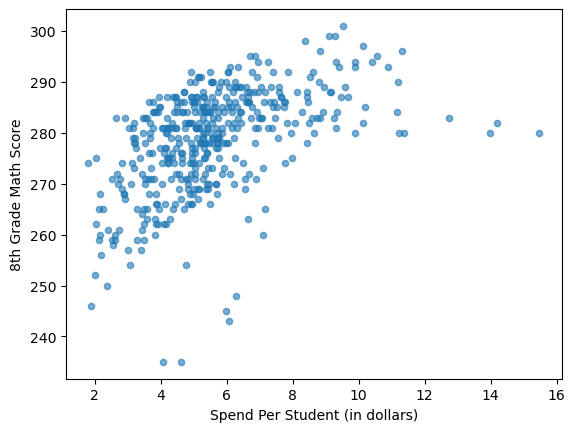

In [29]:
df.plot.scatter(x='SPEND_PER_STUDENT', y='MATH_8', alpha=0.6)
plt.xlabel('Spend Per Student (in dollars)')
plt.ylabel('8th Grade Math Score')

**I used my first feature engineering column here as an exploratory variable. I was interested to see if more was spent on the average student, if they would get a higher math 8 score on average. According to our graph, this seems to be the case. We will have to do more statistical analysis to confirm**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

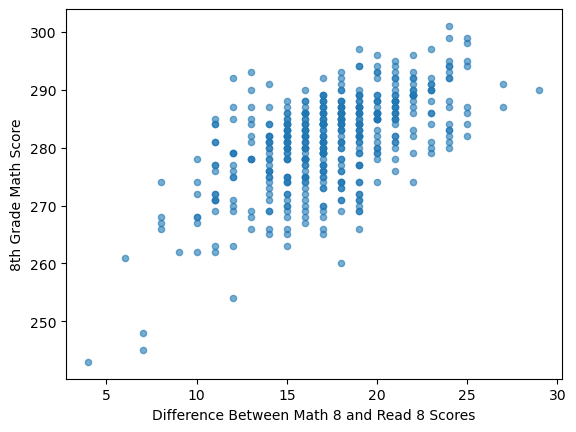

In [13]:
df.plot.scatter(x='DIFF_MATH_READ_8', y='MATH_8', alpha=0.6)
plt.xlabel('Difference Between Math 8 and Read 8 Scores')
plt.ylabel('8th Grade Math Score')

# df.plot.scatter(x='NUM_TOTAL', y='MATH_8', alpha=0.6)
# plt.xlabel('Total Enrollment')
# plt.ylabel('8th Grade Math Score')

****I used my second feature engineering column here as an exploratory variable. I was interested to see how difference in average reading 8 and math 8 predicted average math 8 scores. According to our graph, it seems that those who performed higher in math_8 did noticably better/worse on their reading 8 exams. When the difference in math 8 and reading 8 scores was lower (similar score on each test), they tended to be "lower" scores. We will have to do more statistical analysis to confirm****

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['NUM_8','DIFF_MATH_READ_8','SPEND_PER_STUDENT','MATH_4']].dropna()

#testing the 4 predictors above (2 of them are my feature engineered columns, 2 are already given in the dataframe)

y = df.loc[X.index]['MATH_8']
y.fillna(y.mean(), inplace=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [19]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [20]:
# create your model here
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [24]:
print(model.intercept_)
print(model.coef_)

#For each BETA, heres my interpretation/understanding: 

#BETA-1 (NUM_8) - more eight graders, around same math 8 score
#BETA-2 (DIFF_MATH_READ_8) - more of a difference between 8th grade math & eight grade reading scores, higher math 8 score generally
#BETA-3 (SPEND_PER_STUDENT) - more spend for student, slight increase in math 8 score
#BETA-4 (MATH_4) - higher math 4 score, higher math 8 score generally


23.608223729174313
[-1.35182523e-06  4.14866446e-01  1.13804171e-01  1.04430646e+00]


Text(0, 0.5, '8th Grade Math Score')

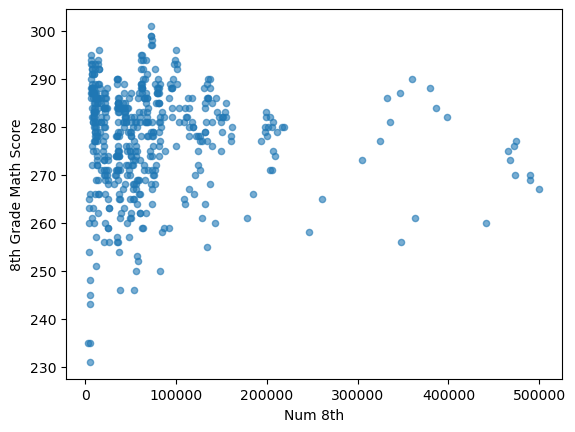

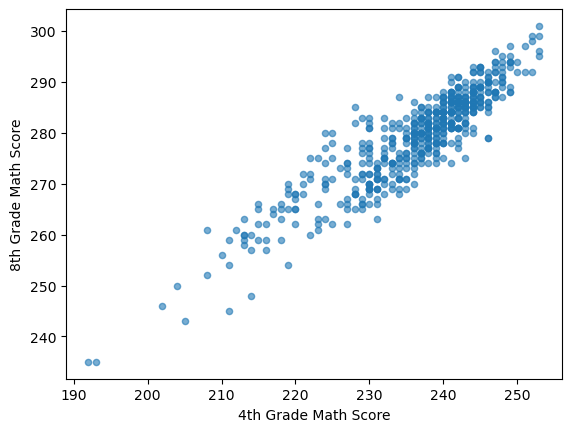

In [31]:
# Extra Testing to visualize beta values
# We already graphed the relationship between DIFF_MATH_READ_8 & SPEND_PER_STUDENT Above
# Check NUM_8 and MATH_4 and how they correlate to MATH_8

df.plot.scatter(x='NUM_8', y='MATH_8', alpha=0.6)
plt.xlabel('Num 8th')
plt.ylabel('8th Grade Math Score')
#not a ton of correlation, refelcts the -.00000135 value

df.plot.scatter(x='MATH_4', y='MATH_8', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')
#positive correlation, reflects the 1.044 value

In [33]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
model.score(X_test, y_test)

0.8749094394901654

In [36]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

2.2954297519796407

In [37]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.843793707225849



We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior on Testing Set')

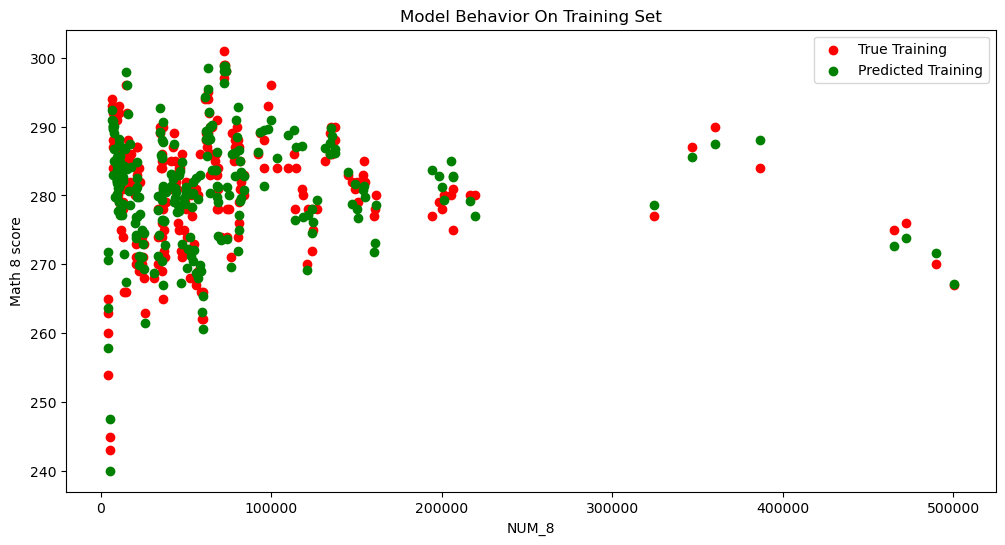

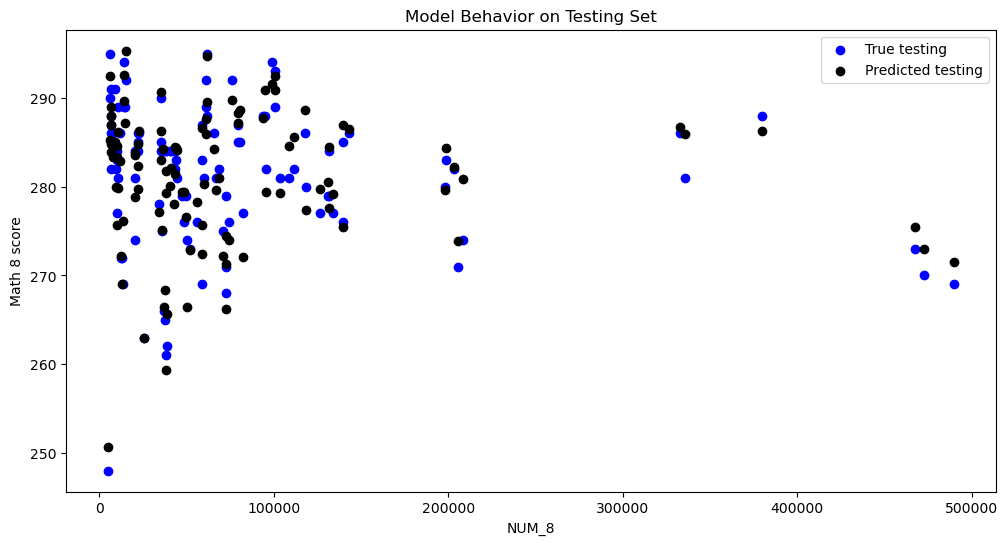

In [46]:
col_name = 'NUM_8'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

#######################################################



f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

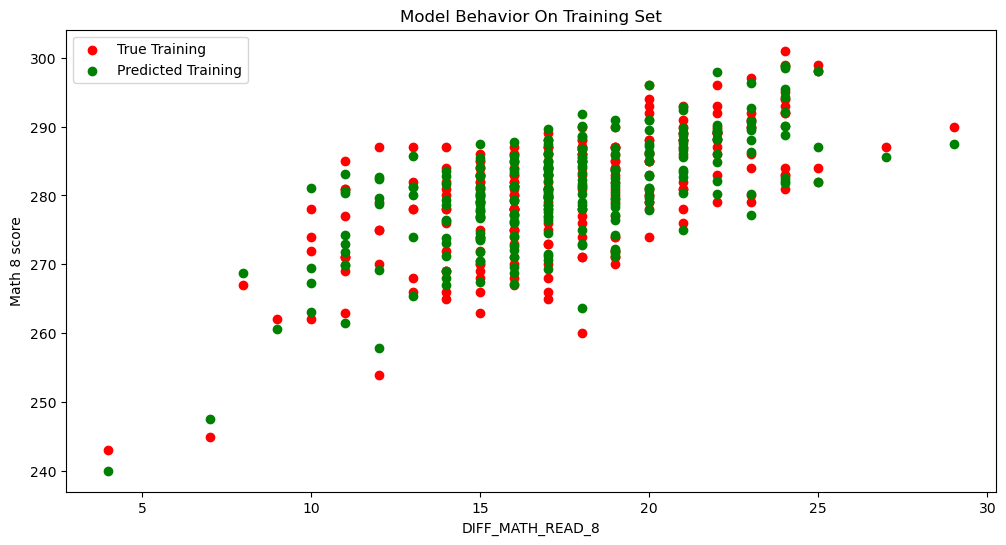

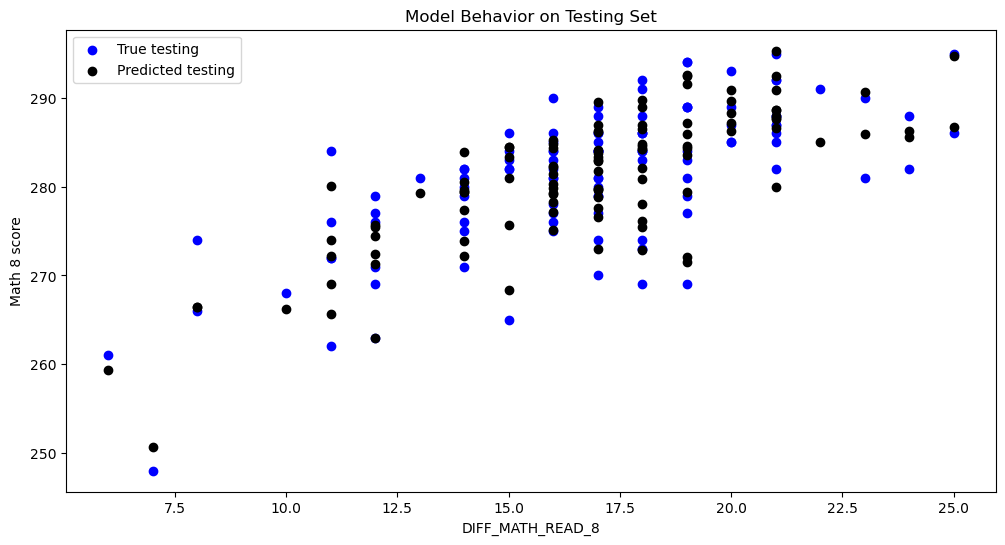

In [47]:
col_name = 'DIFF_MATH_READ_8'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

#####################################################


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

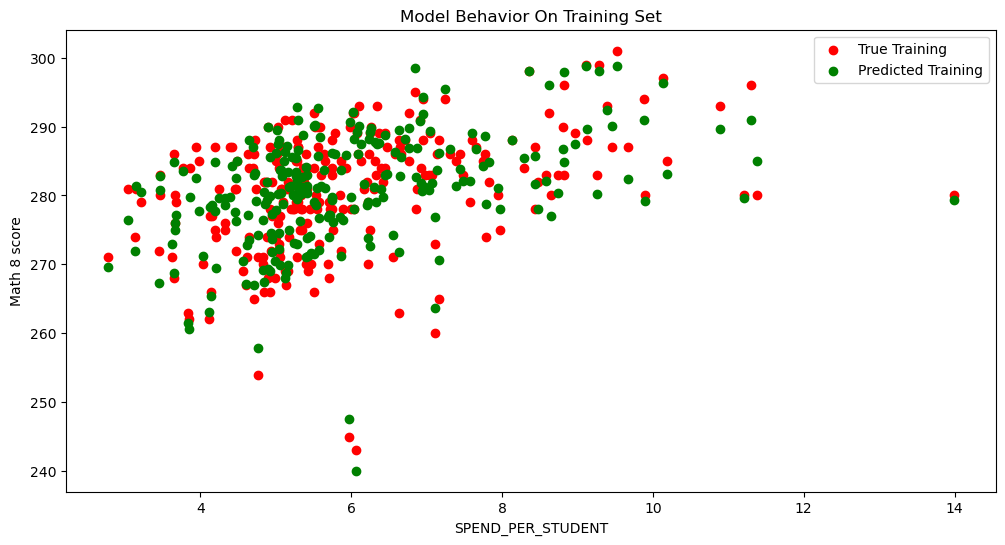

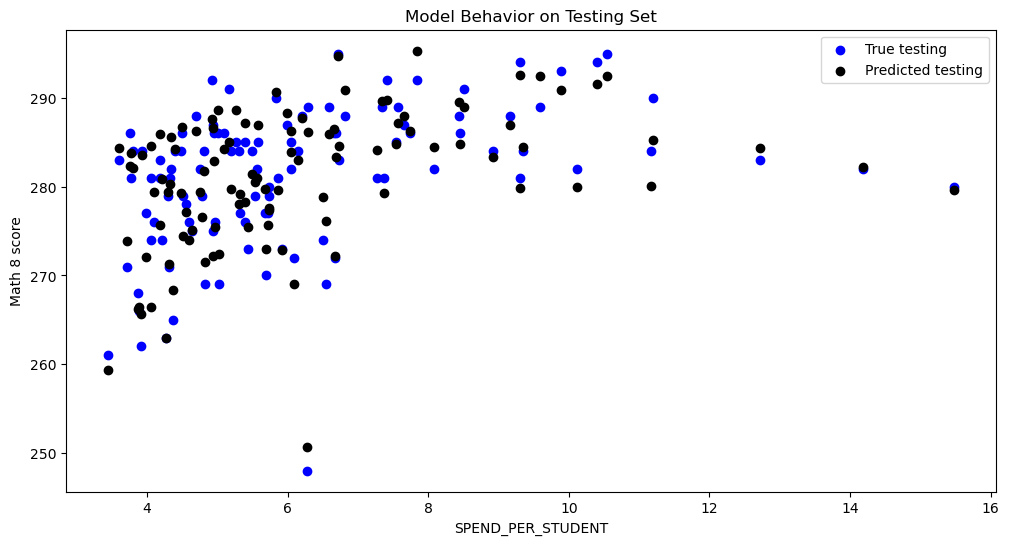

In [48]:
col_name = 'SPEND_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")


######################################################################


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

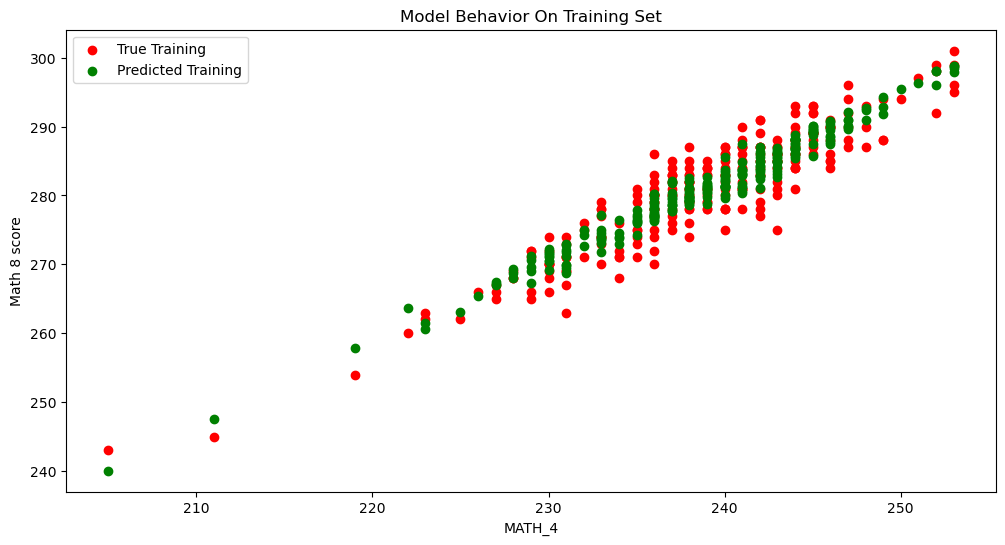

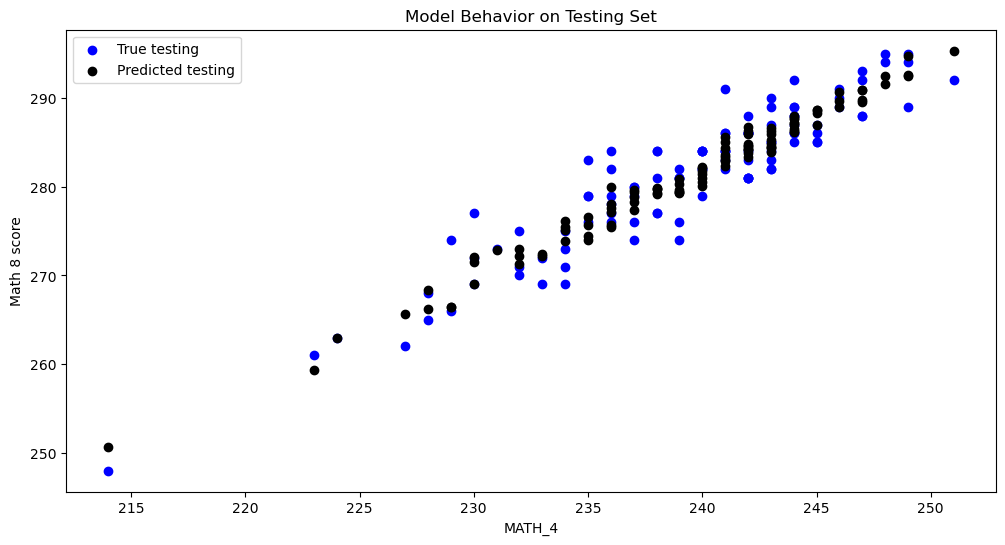

In [49]:
col_name = 'MATH_4'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

#######################################################


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**For the most part, It seems that our model works pretty well on the training set. Additionally, it also generalizes nicely to the testing set. Specifically, this happened well for these two predictors: DIFF_MATH_READ_8 and MATH_4. The beta values were more extreme for these variables, which seems to suggest higher correlation and easier prediction on the models behalf. I'm curious to test this more in the future!**

**This whole tutorial process has been very interesting, and I am excited to learn even more about data science and machine learning this semester. Big thanks to the MDST team for preparing this, and I can't wait to hear which project I'll be working on!**